In [1]:
import BasisFunction as bf
from ThirdOrderSurface import ThirdOrderSurface
from LinearRegression import LinearRegressor
from LinearRegression import RidgeLinearRegressor
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

<Figure size 432x288 with 0 Axes>

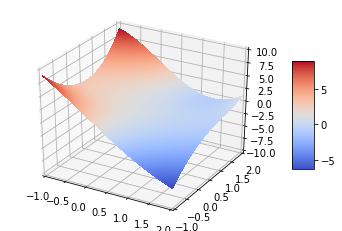

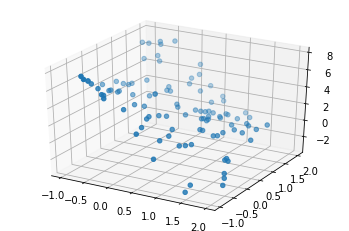

In [94]:
surf = ThirdOrderSurface(
                            (-1, 2, 100), (-1, 2, 100), (-10, 10), 
                            [lambda a: 
                                 1 - 2*a[:, 0] - 2*a[:, 1] 
                                 + 2*np.multiply(a[:, 0], a[:, 1])
                                 - np.multiply(np.power(a[:, 1], 2), 2*np.sin(a[:, 0]))
                                 + np.exp(a[:, 1])
                            ]
                        )
surf.plot(True)
X, t = surf.genGaussianNoisyPoints(100, 1)

fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(X[:, 0].ravel(), X[:, 1].ravel(), t.ravel())


1.1247130157257603


<Figure size 432x288 with 0 Axes>

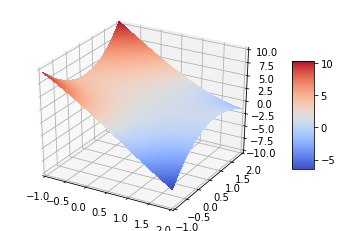

In [95]:
basisFuncs = [
    lambda x: x[:, 0],
    lambda x: x[:, 1],
    lambda x: np.multiply(x[:, 0], x[:, 1]),
    lambda x: np.power(x[:, 0], 2),
    lambda x: np.power(x[:, 1], 2),
    lambda x: np.multiply(np.power(x[:, 0], 2), x[:, 1]),
    lambda x: np.multiply(np.power(x[:, 1], 2), x[:, 0]),
    lambda x: np.power(x[:, 0], 3),
    lambda x: np.power(x[:, 1], 3),
]
xTest, tTest = surf.genGaussianNoisyPoints(5, 1)
"""
for normal regression
"""
regressor = LinearRegressor(basisFuncs, X, t).fit()
yhat = regressor.predict(xTest)
mse = regressor.meanSquareError(tTest)
print(mse)

regressionSurf = ThirdOrderSurface(
                            (-1, 2, 100), (-1, 2, 100), (-10, 10), 
                            [lambda a: regressor.predict(a)]
                        )
regressionSurf.plot(True)

1.1238368111765902


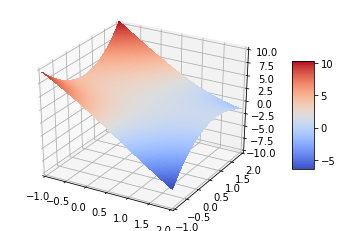

In [97]:
"""
for ridge regression
"""
ridgeRegressor = RidgeLinearRegressor(basisFuncs, X, t, 0.1).fit()
yhatRidge = ridgeRegressor.predict(xTest)
mseRidge = ridgeRegressor.meanSquareError(tTest)
print(mseRidge)
ridgeRegressionSurf = ThirdOrderSurface(
                            (-1, 2, 100), (-1, 2, 100), (-10, 10), 
                            [lambda a: ridgeRegressor.predict(a)]
                        )
ridgeRegressionSurf.plot(False)